第九章 绘图与可视化

9.1 简明matplotlib API入门
matplotlib 是一个用于生成出版级质量图表（通常是二维的）的桌面绘图包。

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

<IPython.core.display.Javascript object>


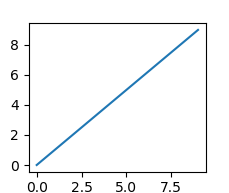

In [7]:
# 简单线性图形
data = np.arange(10)
plt.plot(data)

尽管seaborn等库和pandas内建的绘图函数可以处理大部分绘图的普通细节，但如果你想在提供的函数选项之外进行定制则需要学习一些matplotlib的API

9.1.1 图片与子图

In [11]:
# matplotlib所绘制的图位于图片（Figure）对象中
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure.
    
    Parameters
    ----------
    
    num : integer or string, optional, default: None
        If not provided, a new figure will be created, and the figure number
        will be incremented. The figure objects holds this number in a `number`
        attribute.
        If num is provided, and a figure with this id already exists, make
        it active, and returns a reference to it. If this figure does not
        exists, create it and returns it.
        If num is a string, the window title will be set to this figure's
        `num`.
    
    figsize : tuple of integers, optional, default: None
        width, height in inches. If not provided, defaults to
        :rc:`figure.figsize` = ``[6.4, 4.8]``.
    
    dpi : integer, optional, default: 

<IPython.core.display.Javascript object>


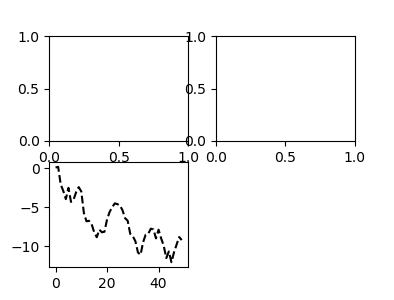

In [15]:
# add_subplot创建一个或多个子图
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')  # matplotlib 会在最后一个图片和子图上进行绘制

<IPython.core.display.Javascript object>


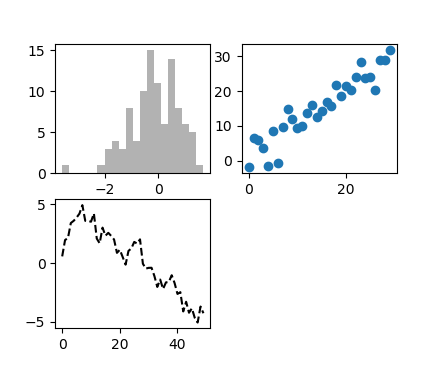

In [20]:
# fig.add_subplot返回对象是Axes Subplot对象，使用这些对象可以直接在其他空白的子图上调用对象的实例方法进行绘图
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3) # 绘制直方图 bins=20=>20等分
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30)) # 绘制离散图
plt.plot(np.random.randn(50).cumsum(), 'k--')  # 绘制折线图

<IPython.core.display.Javascript object>


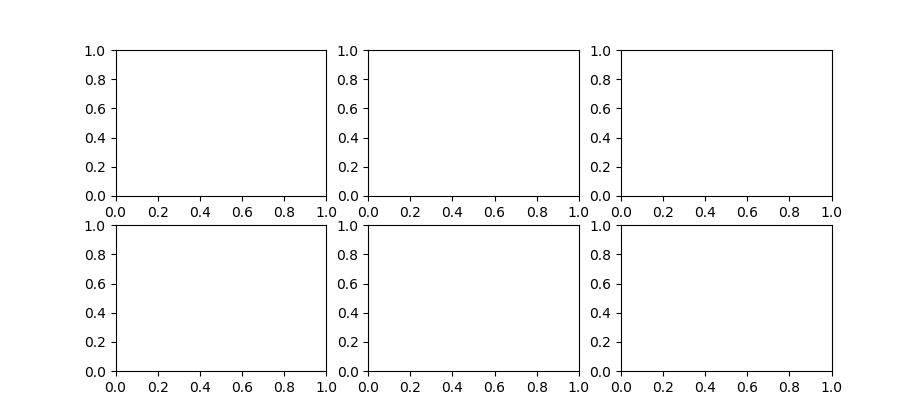

<class 'numpy.ndarray'>


In [24]:
# plt.subplots
'''
    nrows: 子图行数
    ncols: 子图列数
    sharex: 所有子图使用相同的x刻度（调整xlim会影响所有的子图）
    sharey: 所有子图使用相同的y刻度
    subplot_kw: 传入add_subplot的关键字参数字典，用于生成子图
    **fig_kw: 在生成图片时使用的额外关键字参数，例如plt.subplots(2, 2, figsize=(8,6))
'''
fig, axes = plt.subplots(2, 3)
print(type(axes))

9.1.1 调整子图周围的间距
默认情况下，matplotlib会在子图的外部和子图之间留下一定的间距。这个间距都是相对图的高度和宽度来自适应调整的。

<IPython.core.display.Javascript object>


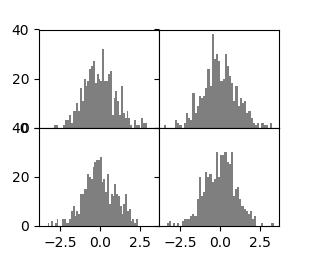

In [25]:
# subplots_adjust 方法更改间距
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
'''
    subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    wspace和hspace分别控制的是图片的宽度和高度百分比，以用作子图间的间距
'''
plt.subplots_adjust(wspace=0, hspace=0)

# 轴标签存在重叠，matplotlib并不检查标签是否重叠，因此需要通过显式指定刻度位置和刻度标签来修复轴标签

9.1.2 颜色、标记和线类型
matplotlib的主函数plot接收带有x和y轴的数组以及一些可选的字符串缩写参数来指明颜色和线类型。

<IPython.core.display.Javascript object>


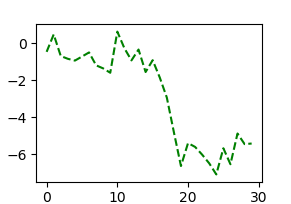

In [27]:
# 绿色破折号绘制x对y的线
plt.plot(np.arange(30), np.random.randn(30).cumsum(), 'g--')

<IPython.core.display.Javascript object>


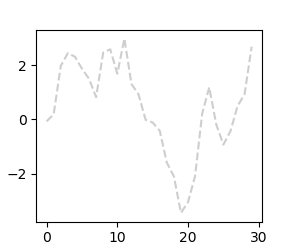

In [32]:
# 颜色和线条样式分离
'''
    color: 可以通过指定十六进制颜色代码方式来指定任何颜色，e.g '#CECECE'
'''
plt.plot(np.arange(30), np.random.randn(30).cumsum(), linestyle='--', color='#CECECE')

<IPython.core.display.Javascript object>


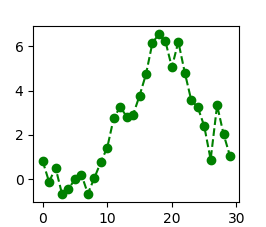

In [35]:
# 带有标记的折线图
'''
    样式字符串中线类型、标记类型必须跟在颜色后面， e.g 'ko--'
'''
plt.plot(np.arange(30), np.random.randn(30).cumsum(), linestyle='--', color='g', marker='o')

<IPython.core.display.Javascript object>


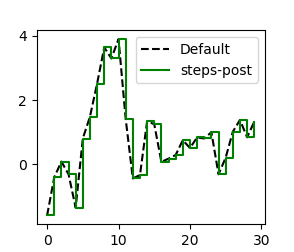

In [41]:
# 对于折线图，默认是线性内插的，可以通过drawstyle选项进行更改
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'g-', drawstyle='steps-post', label='steps-post')
'''
    loc: 'best' 'upper right' 'upper left' 'lower left' 'lower right' 'right' '
        center left' 'center right' 'lower center' 'upper center' 'center'
'''
plt.legend(loc='best')

9.1.3 刻度、标签和图例
对于大多数图表装饰工作，有两种主要的方式：使用程序性的pyplot接口（即matplotlib.pyplot）和更多面向对象的原生matplotlib API。

9.1.3.1 设置标题、轴标签、刻度和刻度标签

<IPython.core.display.Javascript object>


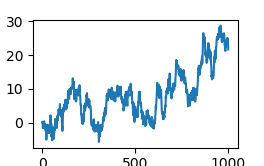

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

<IPython.core.display.Javascript object>


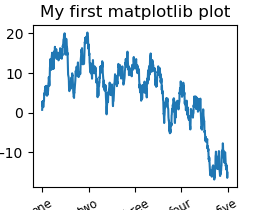

Text(0.5, 0, 'stages')

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
# set_xticks 表示在数据范围内设定刻度位置
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
# set_xticklabels为标签赋值
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
# 设置标题
ax.set_title('My first matplotlib plot')
# 设置x轴标题
ax.set_xlabel('Stages')

<IPython.core.display.Javascript object>


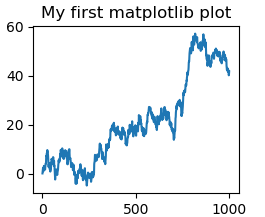

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'My first matplotlib plot')]

In [44]:
# 修改y轴坐标，只需要将x替换成y即可。轴的类型拥有set方法，允许批量设置绘图属性
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

9.1.3.2 添加图例
图例是用来区分绘图元素的另一个重要内容。

<IPython.core.display.Javascript object>


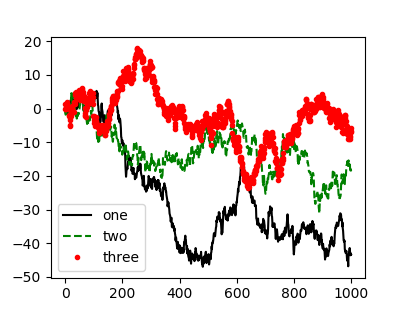

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'r.', label='three')
ax.legend(loc='best')

9.1.4 注释与子图加工
除了标准的绘图类型，还可以在图标上绘制子集的注释，而且注释中可能会包含文本、箭头以及其他图形。

<IPython.core.display.Javascript object>


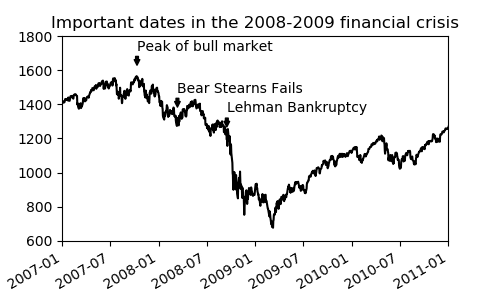

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [50]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


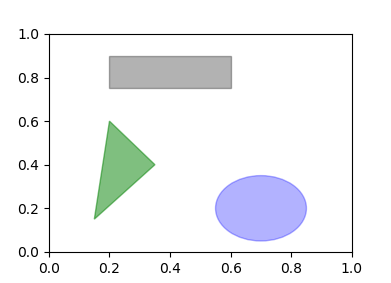

In [51]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

9.1.5 将图片保存到文件

<IPython.core.display.Javascript object>


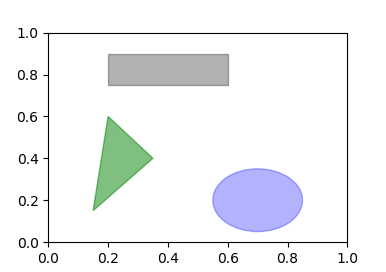

In [52]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 保存图片
'''
    fname: 文件名
    dpi: 每英寸点数的分辨率；默认100，可配置
    facecolor, edgecolor: 子图之外的图形背景，默认白色
    format:  文件格式
    bbox_inches: 要保存图片范围；如果传递'tight'将去掉图片周围空白的部分
'''
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


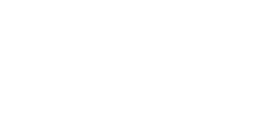

In [55]:
# savefig并非一定是写到硬盘的，他可以将图片写入到所有的文件型对象中，例如BytesIO:
from io import BytesIO
buffer =  BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
print(plot_data)

9.2使用Pandas和seaborn绘图
Seaborn会修改默认的matplotlib配色方案和绘图样式，这样会提高图标的可读性和美观性。

9.2.1 折线图
Series 和DataFrame都有一个plot属性，用于绘制基本的图形。默认情况下，Plot()绘制的是折线图

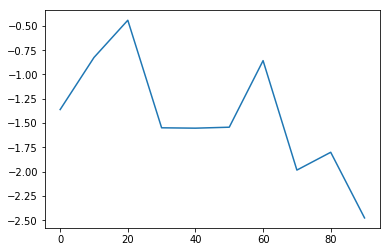

In [3]:
# Series
'''
    label 图例标签
    ax 绘图所用的matplotlib子图对象；如果没有传值，则使用当前活动的mayplotlib子图
    style 传给matplotlib的样式字符串，比如‘ko--’
    alpha 图片不透明度
    kind 可以是‘area’、'bar'、'hist'等
    logy 在y轴上使用对数缩放
    use_index 使用对象索引刻度标签
    rot 刻度标签的旋转
    xticks 用于x轴刻度的值
    yticks 用于y轴刻度的值
    xlim x轴范围
    ylim y轴范围
    grid 展示网格
    
'''
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

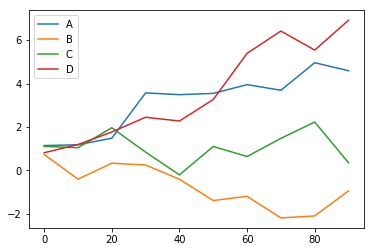

In [4]:
# DataFrame
'''
    subplots 将DataFrame 的每一列绘制在独立的子图中
    sharex 如果subplots=True，则共享相同的x轴、刻度和范围
    sharey 同上
    figsize 用于生成图片尺寸的元祖
    title 标题字符串
    legend 添加子图图例
    sort_columns 按字母顺序绘制各列，默认情况下使用已有的列顺序
'''
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

9.2.2 柱状图
plot.bar 和plot.barh可以分别绘制垂直和水平的柱状图。在绘制柱状图时，Series或DataFrame的索引将会被用作x轴刻度(bar)或y轴刻度(barh)

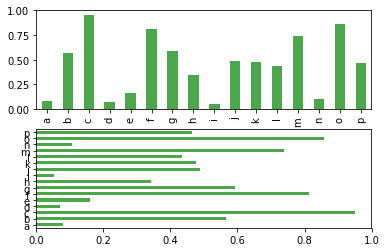

In [6]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='g', alpha=0.7)
data.plot.barh(ax=axes[1], color='g', alpha=0.7)

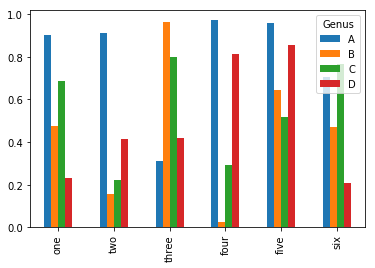

In [7]:
# 在DataFrame 中，柱状图将每一行的值分组到并列的柱子中的一组

df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()

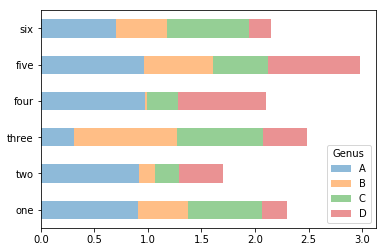

In [10]:
# 堆积柱状图
df.plot.barh(stacked=True, alpha=0.5)

   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4
size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3
size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241


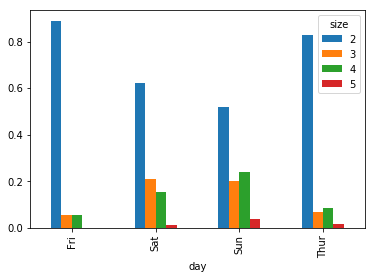

In [14]:
# 绘制堆积柱状图，用于展示每个排队在每天的数据点占比
tips = pd.read_csv('examples/tips.csv')
print(tips.head())
party_counts = pd.crosstab(tips['day'], tips['size'])
print(party_counts.head())

# 没有太多的1人和6人派对
party_counts = party_counts.loc[:, 2:5]
# 标准化至和为1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
print(party_pcts)
party_pcts.plot.bar()

d:\programfiles\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


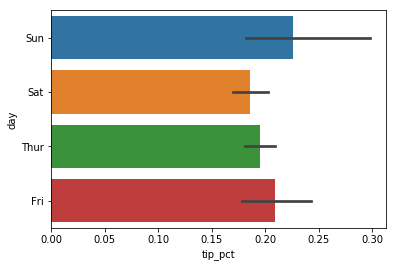

In [16]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])  # tip小费 total_bill总营业额
tips.head()
# 用错误栏按填显示小费百分比
sns.barplot(x='tip_pct', y='day', data=tips, orient='h') 

d:\programfiles\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


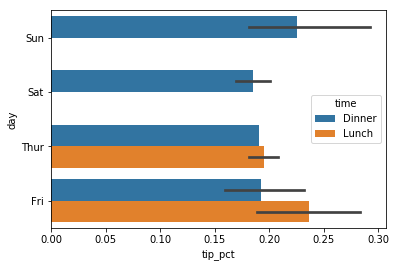

In [17]:
# 'hue'允许我们通过一个额外的分类值将数据分类
# 根据星期日期和时间计算的消费百分比
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

d:\programfiles\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


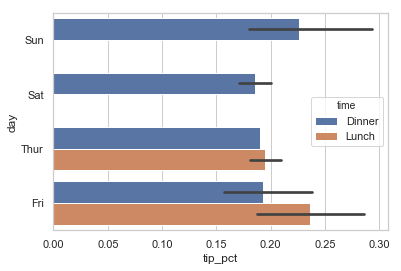

In [19]:
# seaborn自动改变了图标的美观性：默认的调色板、图背景和网格线条颜色。使用seaborn.set在不同的绘图外观中进行切换
sns.set(style="whitegrid")
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

9.2.3 直方图和密度图
直方图是一种条形图，用于给出值频率的离散显示。数据点被分成离散的，均匀间隔的箱，并且绘制每个箱中数据点的数量。

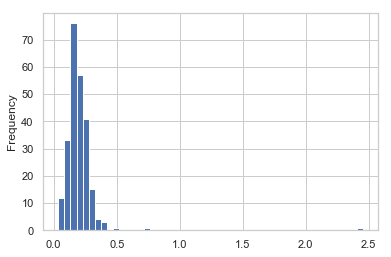

In [20]:
# 小费百分比直方图
tips['tip_pct'].plot.hist(bins=50)

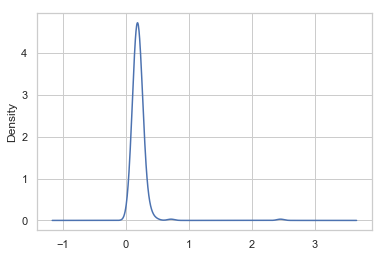

In [21]:
# 密度图是一种与直方图相关的图表类型。他通过计算可能产生观测数据的连续概率分布估计而产生
# 密度图也被称为内核密度估计图（KDE）
tips['tip_pct'].plot.density()  # 小费百分比密度图

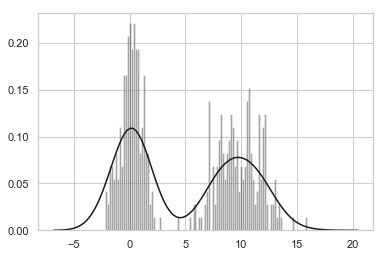

In [22]:
# distplot方法可以绘制直方图和连续密度估计
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')  # 正态混合的标准化直方图与密度故居

9.2.4 散点图或点图
点图或散点图可以用于检验两个一维数据序列之间的关系。

In [23]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
'''
    numpy.diff(a, n=1, axis=-1)
    a 输入矩阵
    n 可选，代表要执行几次差值
    asix 默认最后一列
'''
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


d:\programfiles\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

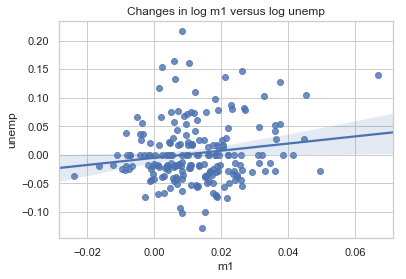

In [24]:
# seaborn 的regplot方法，该方法可以绘制散点图，并拟合出一条线性回归线
sns.regplot('m1', 'unemp', data=trans_data)  # seaborn回归/散点图
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

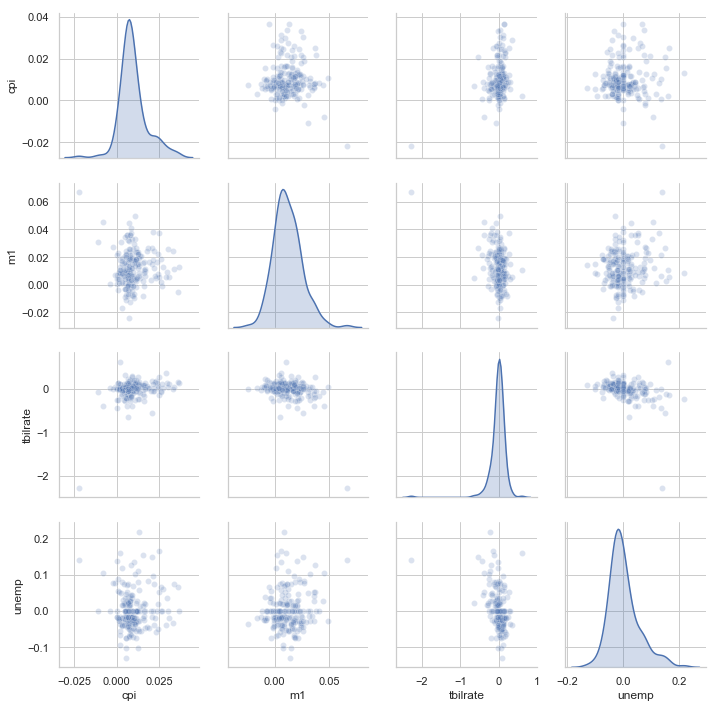

In [25]:
# 查看一组变量中的所有散点图，称为成对图或散点图矩阵
# seaborn.pairplot 
# plot_ksw参数，这个参数使我们能够将配置选项传递给给对角线元素上的各个绘图调用
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})  # statsmodels macro数据成对图矩阵

9.2.5 分面网格和分类数据

d:\programfiles\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
d:\programfiles\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


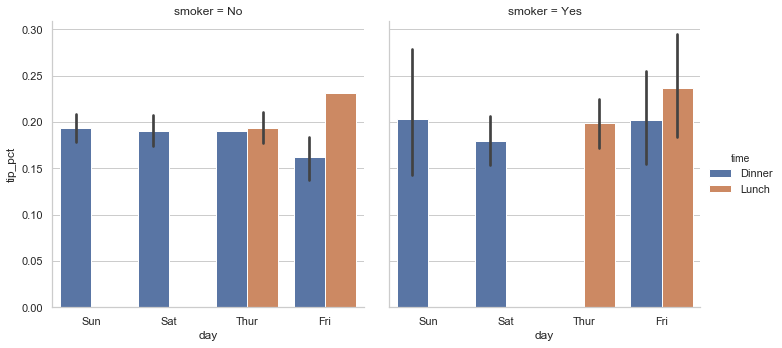

In [26]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

d:\programfiles\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
d:\programfiles\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


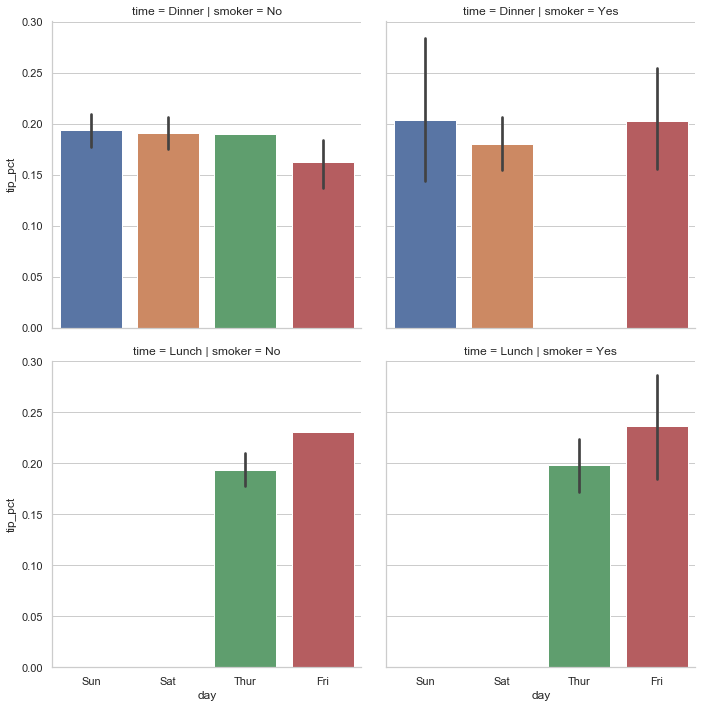

In [27]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

d:\programfiles\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


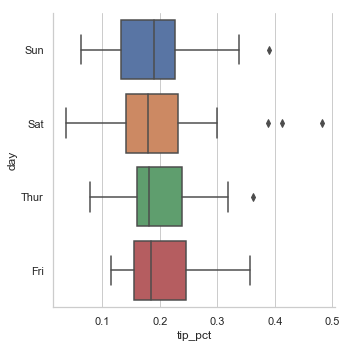

In [28]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

9.3 其它Python可视化工具


如果使创建用于印刷或网页的静态图形，我建议根据你的需要使用默认的matplotlib以及像pandas和seaborn这样的附加库。对于其他数据可视化要求，学习其他可用工具之一可能是有用的。我鼓励你探索Python可视化生态系统，因为他将持续添加新内容并在未来进行更多的创新。